In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from fastai.tabular import add_datepart

from sklearn.linear_model import LinearRegression
from scipy.stats import mannwhitneyu, norm, rankdata

import matplotlib.pyplot as plt

Upload do arquivo netCDF do Center for Space Research - CSR GRACE RL06 Mascon Solutions.

In [2]:
file_nc="C:/Users/Carol/Documents/PEC/COC766 - Mudanca Hidrologica/Testes GRACE data/m_sf.nc"

* Lendo o arquivo netcdf com o Xarray

In [3]:
rl06 = xr.open_dataset(file_nc)
rl06

<xarray.Dataset>
Dimensions:        (lat: 41, lon: 28, time: 163)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 ... 2017-06-10T12:00:00
  * lat            (lat) float64 -18.62 -18.38 -18.12 ... -9.125 -8.875 -8.625
  * lon            (lon) float64 312.4 312.6 312.9 313.1 ... 318.6 318.9 319.1
Data variables:
    lwe_thickness  (time, lat, lon) float32 ...

* Transformando num Pandas dataframe

In [4]:
df=rl06.to_dataframe()

In [5]:
df

lwe_thickness
lat     lon     time                              
-18.625 312.375 2002-04-18 00:00:00     -10.143638
                2002-05-10 12:00:00     -12.210647
                2002-08-16 12:00:00     -34.547142
                2002-09-16 00:00:00     -31.583420
                2002-10-16 12:00:00     -38.600983
...                                            ...
-8.625  319.125 2017-01-21 00:00:00     -15.304106
                2017-03-31 12:00:00     -16.904861
                2017-04-24 12:00:00     -14.829320
                2017-05-13 00:00:00     -18.969000
                2017-06-10 12:00:00     -15.100459

[187124 rows x 1 columns]

* Fazendo média no tempo

,lwe_thickness
time,
2002-04-18 00:00:00,6.262565
2002-05-10 12:00:00,-1.682160
2002-08-16 12:00:00,-13.420528
2002-09-16 00:00:00,-14.096852
2002-10-16 12:00:00,-16.496149
...,...
2017-01-21 00:00:00,-19.937321
2017-03-31 12:00:00,-23.189819
2017-04-24 12:00:00,-24.721739


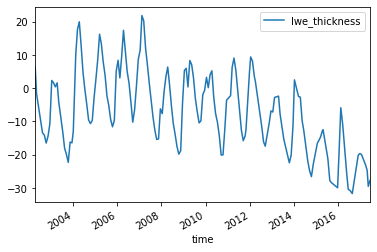

In [6]:
media_t= df.groupby('time').mean()
media_t.plot()
media_t

#### Tentativa de calcular o MSC, assim como Getirana (2016) fez no artigo dele

"In this
sense, the water deficit is estimated by subtracting their
respective mean seasonal cycles (MSCs) from the
TWSA series. MSC is determined from the average of
each month, January–December, over the period of data
availability.
To detect the presence of breaks and changes in the
MSC-detrended TWSA time series over eastern Brazil,
two methods were used: the Pettitt (1979) method and
the Hubert segmentation (Hubert et al. 1989)""

In [7]:
media_t=media_t.reset_index()
media_t

,time,lwe_thickness
0,2002-04-18 00:00:00,6.262565
1,2002-05-10 12:00:00,-1.682160
2,2002-08-16 12:00:00,-13.420528
3,2002-09-16 00:00:00,-14.096852
4,2002-10-16 12:00:00,-16.496149
...,...,...
158,2017-01-21 00:00:00,-19.937321
159,2017-03-31 12:00:00,-23.189819
160,2017-04-24 12:00:00,-24.721739
161,2017-05-13 00:00:00,-29.533564


In [8]:
add_datepart(media_t,'time',drop=False)
media_t

,time,lwe_thickness,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,2002-04-18 00:00:00,6.262565,2002,4,16,18,3,108,False,False,False,False,False,False,1019088000
1,2002-05-10 12:00:00,-1.682160,2002,5,19,10,4,130,False,False,False,False,False,False,1021032000
2,2002-08-16 12:00:00,-13.420528,2002,8,33,16,4,228,False,False,False,False,False,False,1029499200
3,2002-09-16 00:00:00,-14.096852,2002,9,38,16,0,259,False,False,False,False,False,False,1032134400
4,2002-10-16 12:00:00,-16.496149,2002,10,42,16,2,289,False,False,False,False,False,False,1034769600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2017-01-21 00:00:00,-19.937321,2017,1,3,21,5,21,False,False,False,False,False,False,1484956800
159,2017-03-31 12:00:00,-23.189819,2017,3,13,31,4,90,True,False,True,False,False,False,1490961600
160,2017-04-24 12:00:00,-24.721739,2017,4,17,24,0,114,False,False,False,False,False,False,1493035200
161,2017-05-13 00:00:00,-29.533564,2017,5,19,13,5,133,False,False,False,False,False,False,1494633600


In [9]:
media_t.index= media_t['time']
media_t

,time,lwe_thickness,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
time,,,,,,,,,,,,,,,
2002-04-18 00:00:00,2002-04-18 00:00:00,6.262565,2002,4,16,18,3,108,False,False,False,False,False,False,1019088000
2002-05-10 12:00:00,2002-05-10 12:00:00,-1.682160,2002,5,19,10,4,130,False,False,False,False,False,False,1021032000
2002-08-16 12:00:00,2002-08-16 12:00:00,-13.420528,2002,8,33,16,4,228,False,False,False,False,False,False,1029499200
2002-09-16 00:00:00,2002-09-16 00:00:00,-14.096852,2002,9,38,16,0,259,False,False,False,False,False,False,1032134400
2002-10-16 12:00:00,2002-10-16 12:00:00,-16.496149,2002,10,42,16,2,289,False,False,False,False,False,False,1034769600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-21 00:00:00,2017-01-21 00:00:00,-19.937321,2017,1,3,21,5,21,False,False,False,False,False,False,1484956800
2017-03-31 12:00:00,2017-03-31 12:00:00,-23.189819,2017,3,13,31,4,90,True,False,True,False,False,False,1490961600
2017-04-24 12:00:00,2017-04-24 12:00:00,-24.721739,2017,4,17,24,0,114,False,False,False,False,False,False,1493035200


In [10]:
media_t=media_t.drop(['timeDayofweek','timeDayofyear','timeIs_month_end','timeIs_month_start','timeIs_quarter_end','timeIs_quarter_start','timeIs_year_end','timeIs_year_start','timeElapsed','time','timeWeek','timeDay'], axis=1)
media_t

,lwe_thickness,timeYear,timeMonth
time,,,
2002-04-18 00:00:00,6.262565,2002,4
2002-05-10 12:00:00,-1.682160,2002,5
2002-08-16 12:00:00,-13.420528,2002,8
2002-09-16 00:00:00,-14.096852,2002,9
2002-10-16 12:00:00,-16.496149,2002,10
...,...,...,...
2017-01-21 00:00:00,-19.937321,2017,1
2017-03-31 12:00:00,-23.189819,2017,3
2017-04-24 12:00:00,-24.721739,2017,4


In [11]:
serie_clim=[]

for i in range(1,13): 
    serie_clim.append(media_t[media_t.index.month==i].mean())
    i =+1

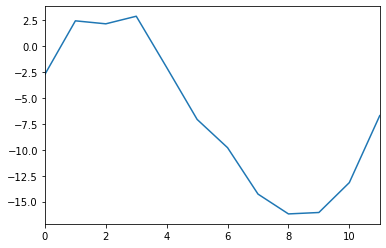

In [12]:
df_serie_clim = pd.DataFrame(serie_clim)
df_serie_clim['timeYear']= np.nan
df_serie_clim['lwe_thickness'].plot()

In [13]:
#media_t.index= media_t['timeMonth']
#media_t

In [14]:
media_t.reset_index(drop = True, inplace = True)
media_t.sort_values(by=['timeYear','timeMonth'])


,lwe_thickness,timeYear,timeMonth
0,6.262565,2002,4
1,-1.682160,2002,5
2,-13.420528,2002,8
3,-14.096852,2002,9
4,-16.496149,2002,10
...,...,...,...
158,-19.937321,2017,1
159,-23.189819,2017,3
160,-24.721739,2017,4
161,-29.533564,2017,5


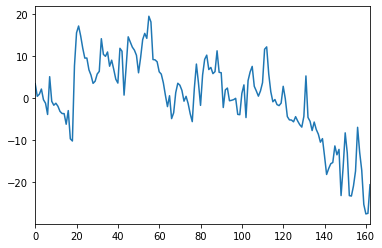

In [15]:
diferenca = []
for index, row in media_t.iterrows():
    mes = row['timeMonth']
    tws = row['lwe_thickness']
    media = float(df_serie_clim[df_serie_clim['timeMonth']==mes]['lwe_thickness'])
    diferenca.append(tws-media)
media_diferenca = media_t.copy()
media_diferenca['diferenca'] = diferenca
media_diferenca['diferenca'].plot()

##### Código do thodson-usgs no github (https://github.com/USGS-python/trend/blob/master/trend/__init__.py) para o teste Pettitt

In [16]:
def pettitt(x, alpha=0.05):
    """Pettitt's change-point test
    A nonparameteric test for detecting change points in a time series.
    Parameters
    ----------
    x : array_like
        Observations taken at a fixed frequency.
    alpha : float
        Significance level
    Return
    ------
    The index of the change point of the series, provided that it is
    statistically significant.
    """
    U_t = np.zeros_like(x)
    n = len(x)

    r = rankdata(x)
    for i in np.arange(n):
        U_t[i] = 2 * np.sum(r[:i+1]) - (i+1)*(n-1)

    t = np.argmax(np.abs(U_t))
    K_t = U_t[t]

    p = 2.0 * np.exp((-6.0 * K_t**2)/(n**3 + n**2))

    if p > alpha:
        return t
    else:
        return np.nan

In [17]:
pettitt(media_diferenca['diferenca'])

nan

#### Aplicação dos testes Man Kendall e Sen's Slope (Como Sun et al., (2016), Oliveira et al., (2014) e Yang et al., (2017))

##### Código do thodson-usgs no github (https://github.com/USGS-python/trend/blob/master/trend/__init__.py) para o teste Mann-Kendal e Sen's slope

In [18]:
def mk_z(s, var_s):
    """Computes the MK test statistic, Z.
    Parameters
    ----------
    s : float
        The MK trend statistic, S.
    var_s : float
        Variance of S.
    Returns
    -------
    MK test statistic, Z.
    """
    # calculate the MK test statistic
    if s > 0:
        z = (s - 1)/np.sqrt(var_s)
    elif s < 0:
        z = (s + 1)/np.sqrt(var_s)
    else:
        z = 0

    return z


def mk_score(x):
    """Computes S statistic used in Mann-Kendall tests.
    Parameters
    ----------
    x : array_like
        Chronologically ordered array of observations.
    Returns
    -------
    MK trend statistic (S).
    """
    x = x[~np.isnan(x)]
    n = len(x)
    s = 0

    for j in np.arange(1, n):
        s += np.sum(np.sign(x[j] - x[0:j]))

    return s


def mk_score_variance(x):
    """Computes corrected variance of S statistic used in Mann-Kendall tests.
    Equation 8.4 from Helsel and Hirsch (2002).
    Parameters
    ----------
    x : array_like
    Returns
    -------
    Variance of S statistic
    Note that this might be equivalent to:
        See page 728 of Hirsch and Slack
    References
    ----------
    .. [1] Helsel and Hirsch, R.M. 2002. Statistical Methods in Water Resources.
    """
    x = x[~np.isnan(x)]
    n = len(x)
    # calculate the unique data
    unique_x = np.unique(x)
    # calculate the number of tied groups
    g = len(unique_x)

    # calculate the var(s)
    if n == g:  # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18

    else:  # there are some ties in data
        tp = np.zeros_like(unique_x)
        for i in range(len(unique_x)):
            tp[i] = sum(x == unique_x[i])
        var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

    return var_s

In [19]:
def mann_kendall(x, alpha=0.05):
    """Mann-Kendall (MK) is a nonparametric test for monotonic trend.
    Parameters
    ----------
    x : array
        Observations taken at a fixed frequency.
    Returns
    -------
    z : float
        Normalized MK test statistic.
    Examples
    --------
    >>> x = np.random.rand(100) + np.linspace(0,.5,100)
    >>> z,p = kendall(x)
    Attribution
    -----------
    Modified from code by Michael Schramn available at
    https://github.com/mps9506/Mann-Kendall-Trend/blob/master/mk_test.py
    """
    n = len(x)

    s = mk_score(x)
    var_s = mk_score_variance(x)

    z = mk_z(s, var_s)
    # calculate the p_value
    p_value = 2*(1-norm.cdf(abs(z)))  # two tail test

    return p_value

In [20]:
mann_kendall(media_diferenca['diferenca'])

0.0

In [21]:
def sen_diff(x):
    """Sen's difference operator.
    Paramaters
    ----------
    x : array_like
        Observations taken at a fixed frequency.
    Returns
    -------
    Sen difference
    """
    #x = x[~np.isnan(x)]
    n = len(x)
    N = int(n*(n-1)/2)  # number of slope estimates
    s = np.zeros(N)
    i = 0
    for j in np.arange(1, n):
        #s[i:j+i] = (x[j] - x[0:j])/np.arange(1, j+1)
        s[i:j+i] = (x[j] - x[0:j])/np.arange(j, 0, -1)
        i += j

    return s


def sen_slope(x, alpha=None):
    """A nonparametric estimate of trend.
        Parameters
    ----------
    x : array_like
        Observations taken at a fixed frequency.
    Notes
    -----
    This method works with missing or censored data, as long as less <20% of
    observations are censored.
    References
    ----------
    .. [1] Helsel and Hirsch, R.M. 2002. Statistical Methods in Water Resources.
    .. [2] https://vsp.pnnl.gov/help/vsample/nonparametric_estimate_of_trend.htm
    """
    s = sen_diff(x)
    s.sort()

    if alpha:
        N = len(s)
        # calculate confidence limits
        C_alpha = norm.ppf(1-alpha/2)*np.sqrt(np.nanvar(x))
        U = int(np.round(1 + (N + C_alpha)/2))
        L = int(np.round((N - C_alpha)/2))
        return np.nanmedian(s), s[L], s[U]

    else:
        return np.nanmedian(s)


In [22]:
sen_slope(media_diferenca['diferenca'])

-0.14153721286054552